In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [129]:
#load dataset
df = pd.read_csv('/home/rrr/ardi/program/mojo/notebooks/loan_data_2007_2014.csv')
df

/tmp/ipykernel_8802/3764158147.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/rrr/ardi/program/mojo/notebooks/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

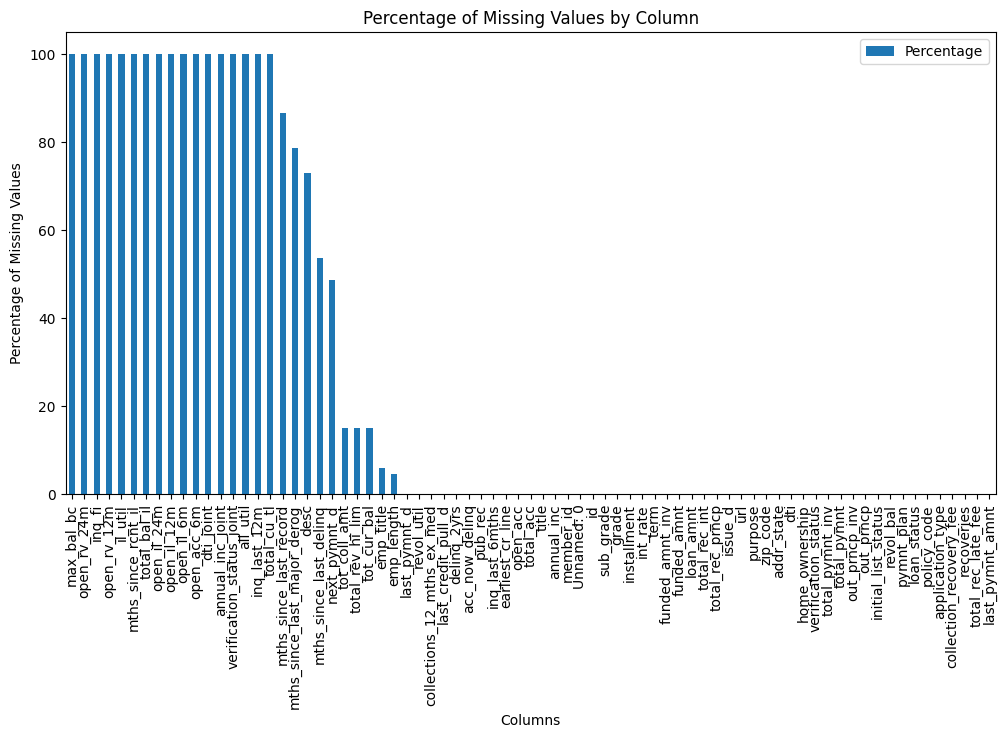

In [131]:
# Calculate the percentage of missing values in df2
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
#order by percentage missing
new_df = new_df.T.sort_values(by='Percentage', ascending=False)
new_df.plot(kind='bar', figsize=(12, 6))
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.show()


In [132]:
# Keeping only those features with less than 20% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 20)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))
print("Features kept:", features_to_keep)



#print features with more than 80% missing values
features_to_drop = df.columns[((df.isnull().sum()/len(df))*100 > 80)].to_list()
print("Features with more than 80% missing values:", features_to_drop)

Total features before: 75
Total features now: 53
Features kept: ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
Features with more than 80% missing values: ['mths_since_last_record', 'annual_inc_joint', 'dti_joint', 'verification_statu

In [133]:
#check double features
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [134]:
relevant_features=['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc',
                'pub_rec','revol_bal','revol_util','total_acc','last_pymnt_amnt','loan_status']
print(len(relevant_features))

21


In [135]:
df=df[relevant_features]
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (466285, 21)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,171.62,Fully Paid
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,119.66,Charged Off
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,649.91,Fully Paid
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,357.48,Fully Paid
4,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,67.79,Current


In [136]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt
count,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000
mean,14317.277577,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,3123.913796
std,8286.509164,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,5554.737393
min,500.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,312.620000
50%,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,545.960000
75%,20000.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,3187.510000
max,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,36234.440000


In [137]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [138]:
target_loan= ["Fully Paid","Charged Off"]
df=df[df["loan_status"].isin(target_loan)]
print(df.shape)

(227214, 21)


In [139]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             8673
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              186
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64

In [140]:
#handling null value emp_length and revol_util
#emp_length is filled with mode because it is a categorical variable
#revol_util is filled with median because it is a numerical variable
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())

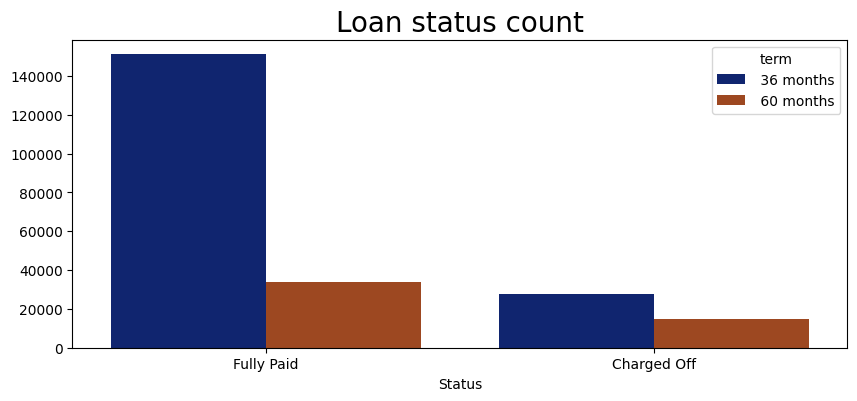

In [141]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="term",palette='dark')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)
plt.show()

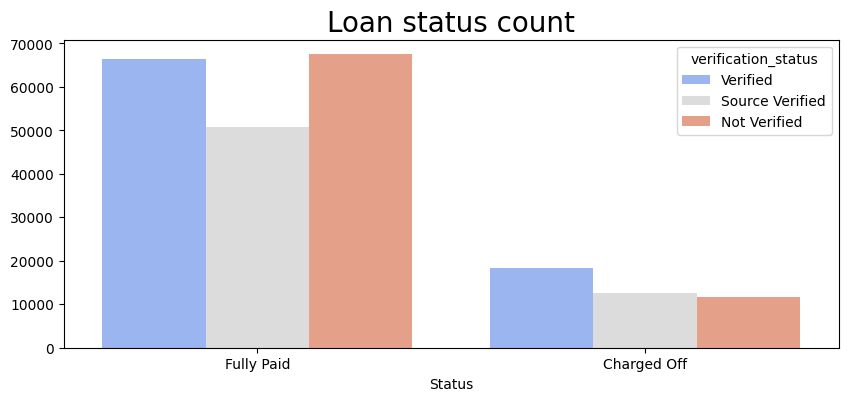

In [142]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="verification_status",palette='coolwarm')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)
plt.show()

/tmp/ipykernel_8802/157373305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="emp_length",palette='spring')


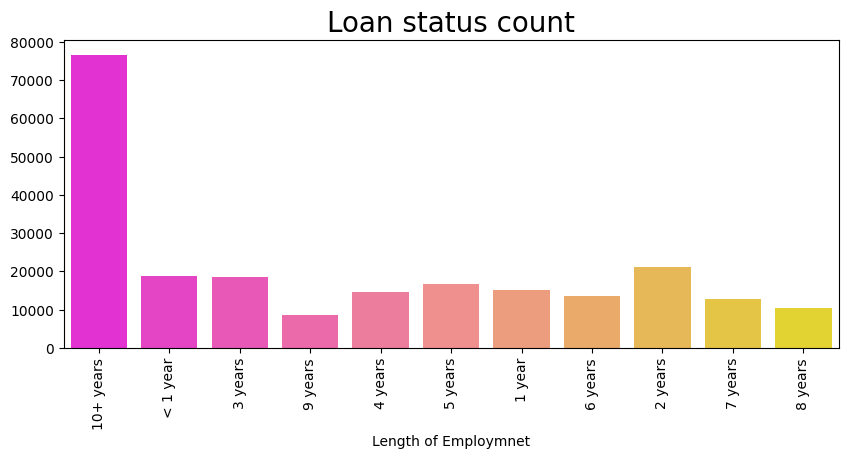

In [143]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="emp_length",palette='spring')
ax.set(xlabel='Length of Employmnet', ylabel='')
ax.set_title('Loan status count', size=20)
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_8802/3096990426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,y="grade",palette='rocket')


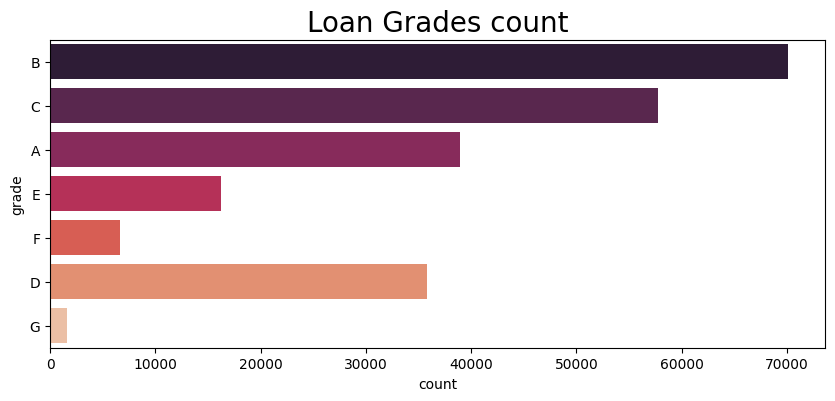

In [144]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,y="grade",palette='rocket')
ax.set_title('Loan Grades count', size=20)
plt.show()

/tmp/ipykernel_8802/2227739446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="purpose",y='loan_amnt',palette='spring')


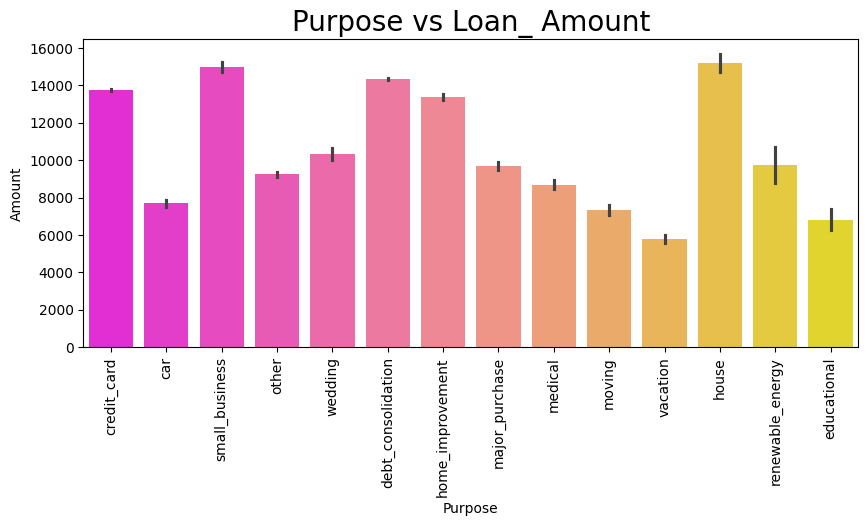

In [145]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipykernel_8802/1497913429.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="home_ownership",y='annual_inc',palette='viridis')


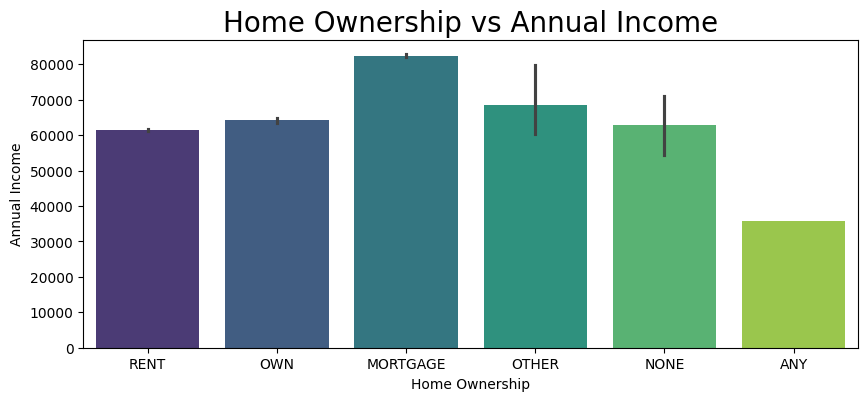

In [146]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

In [147]:
# Extract the numeric part and convert to integer
df['term_numeric'] = df['term'].str.extract(r'(\d+)').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227214 entries, 0 to 466283
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            227214 non-null  int64  
 1   term                 227214 non-null  object 
 2   int_rate             227214 non-null  float64
 3   installment          227214 non-null  float64
 4   grade                227214 non-null  object 
 5   sub_grade            227214 non-null  object 
 6   emp_length           227214 non-null  object 
 7   home_ownership       227214 non-null  object 
 8   annual_inc           227214 non-null  float64
 9   verification_status  227214 non-null  object 
 10  purpose              227214 non-null  object 
 11  dti                  227214 non-null  float64
 12  delinq_2yrs          227214 non-null  float64
 13  inq_last_6mths       227214 non-null  float64
 14  open_acc             227214 non-null  float64
 15  pub_rec              2

In [148]:
df = df.drop(columns=['term'])
df

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,term_numeric
0,5000,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,171.62,Fully Paid,36
1,2500,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,119.66,Charged Off,60
2,2400,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,649.91,Fully Paid,36
3,10000,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,357.48,Fully Paid,36
5,5000,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,161.03,Fully Paid,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,18.25,217.65,D,D3,5 years,MORTGAGE,37536.0,Verified,medical,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0,217.65,Charged Off,60
466277,18000,7.90,563.23,A,A4,3 years,RENT,90000.0,Verified,debt_consolidation,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0,563.23,Charged Off,36
466278,10000,18.25,362.78,D,D3,10+ years,RENT,42000.0,Source Verified,vacation,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0,5501.60,Fully Paid,36
466281,22000,19.97,582.50,D,D5,10+ years,MORTGAGE,78000.0,Verified,debt_consolidation,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0,17.50,Charged Off,60


In [149]:
# Dividing our features into categorical and numerical
categorical=[feature for feature in df.columns if df[feature].dtype=='object']
numerical=[feature for feature in df.columns if feature not in categorical]
print("Categorical columns:",categorical)
print("Numerical columns:",numerical)

Categorical columns: ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'loan_status']
Numerical columns: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt', 'term_numeric']


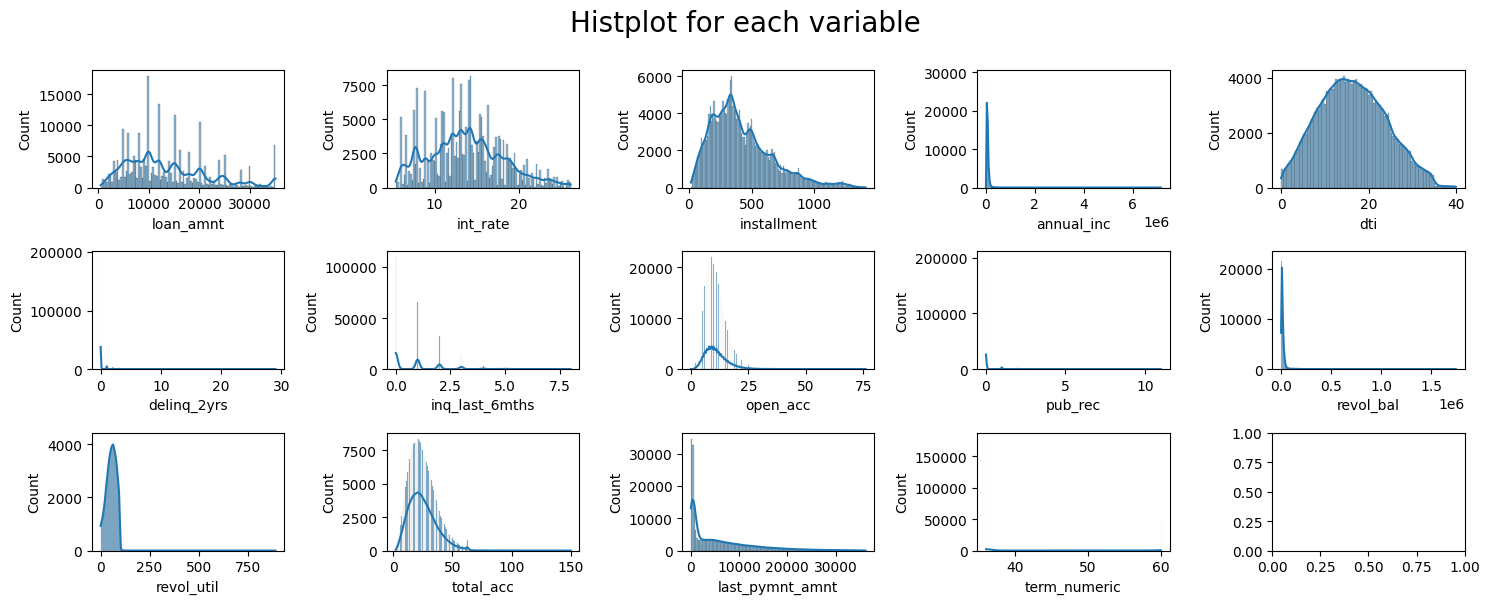

In [150]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical)
plt.tight_layout()

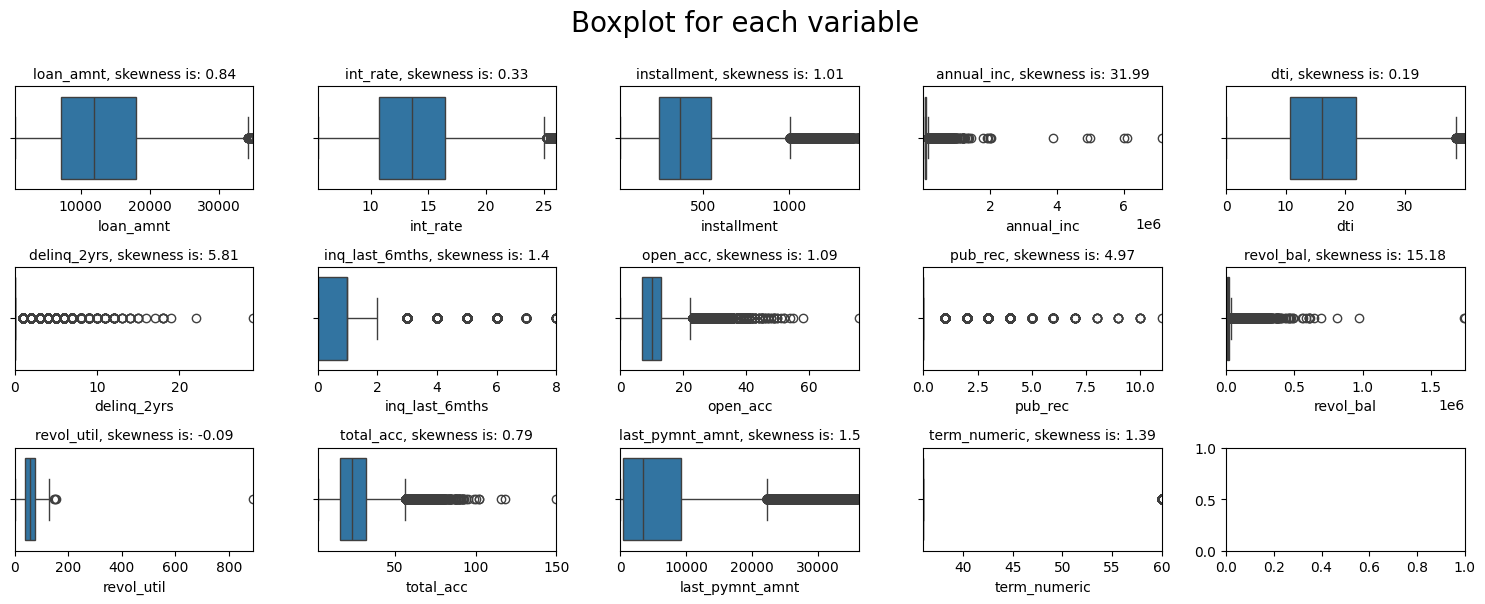

In [151]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

In [152]:
# Remove ' years' or ' year' (with space) → replace with empty string
df['emp_length'] = df['emp_length'].str.replace(' years', '', regex=False)
df['emp_length'] = df['emp_length'].str.replace(' year', '', regex=False)  # singular

# Remove any internal spaces (e.g., '< 1' → '<1')
df['emp_length'] = df['emp_length'].str.replace(' ', '', regex=False)

print("After:", df['emp_length'].unique())

After: ['10+' '<1' '3' '9' '4' '5' '1' '6' '2' '7' '8']


In [153]:
# Label Encoding
df['grade']= df['grade'].map({'A':0,'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})

df['sub_grade']= df['sub_grade'].map({'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 
                                      'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 
                                      'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 
                                      'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 
                                      'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 
                                      'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 
                                      'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34})

df['emp_length']= df['emp_length'].map({'<1': 0,'1': 1,'2': 2,'3': 3,
                                        '4': 4, '5': 5,'6': 6,'7': 7,
                                        '8': 8,'9': 9, '10+': 10})

df['loan_status']= df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import joblib
# 1. Tentukan kolom target
cat_columns = ['home_ownership','verification_status','purpose','grade','sub_grade']

# 2. Inisialisasi Encoder
# drop='first' : Sama seperti drop_first=True di pandas
# sparse_output=False : Agar outputnya berupa array biasa (bukan sparse matrix)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='error')

# 3. Fit dan Transform data
# Ini akan mempelajari kategori apa saja yang ada (A, B, C, dst)
encoded_array = encoder.fit_transform(df[cat_columns])

# 4. Ubah kembali ke DataFrame
# get_feature_names_out() otomatis memberi nama kolom: home_ownership_RENT, grade_B, dll
encoded_df = pd.DataFrame(encoded_array, 
                          columns=encoder.get_feature_names_out(cat_columns),
                          index=df.index)

# 5. Gabungkan dengan data asli (dan buang kolom kategori lama)
df_clean = pd.concat([df.drop(cat_columns, axis=1), encoded_df], axis=1)

# 6. SIMPAN ENCODER (Penting!)
joblib.dump(encoder, 'ohe_encoder.pkl')

print("Encoding selesai dan encoder disimpan.")
df_clean.head()

Encoding selesai dan encoder disimpan.


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,term_numeric,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,sub_grade_1,sub_grade_2,sub_grade_3,sub_grade_4,sub_grade_5,sub_grade_6,sub_grade_7,sub_grade_8,sub_grade_9,sub_grade_10,sub_grade_11,sub_grade_12,sub_grade_13,sub_grade_14,sub_grade_15,sub_grade_16,sub_grade_17,sub_grade_18,sub_grade_19,sub_grade_20,sub_grade_21,sub_grade_22,sub_grade_23,sub_grade_24,sub_grade_25,sub_grade_26,sub_grade_27,sub_grade_28,sub_grade_29,sub_grade_30,sub_grade_31,sub_grade_32,sub_grade_33,sub_grade_34
0,5000,10.65,162.87,10,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,171.62,0,36,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500,15.27,59.83,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,119.66,1,60,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2400,15.96,84.33,10,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,649.91,0,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10000,13.49,339.31,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,357.48,0,36,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5000,7.90,156.46,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,161.03,0,36,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227214 entries, 0 to 466283
Data columns (total 76 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            227214 non-null  int64  
 1   int_rate                             227214 non-null  float64
 2   installment                          227214 non-null  float64
 3   emp_length                           227214 non-null  int64  
 4   annual_inc                           227214 non-null  float64
 5   dti                                  227214 non-null  float64
 6   delinq_2yrs                          227214 non-null  float64
 7   inq_last_6mths                       227214 non-null  float64
 8   open_acc                             227214 non-null  float64
 9   pub_rec                              227214 non-null  float64
 10  revol_bal                            227214 non-null  int64  
 11  revol_util        

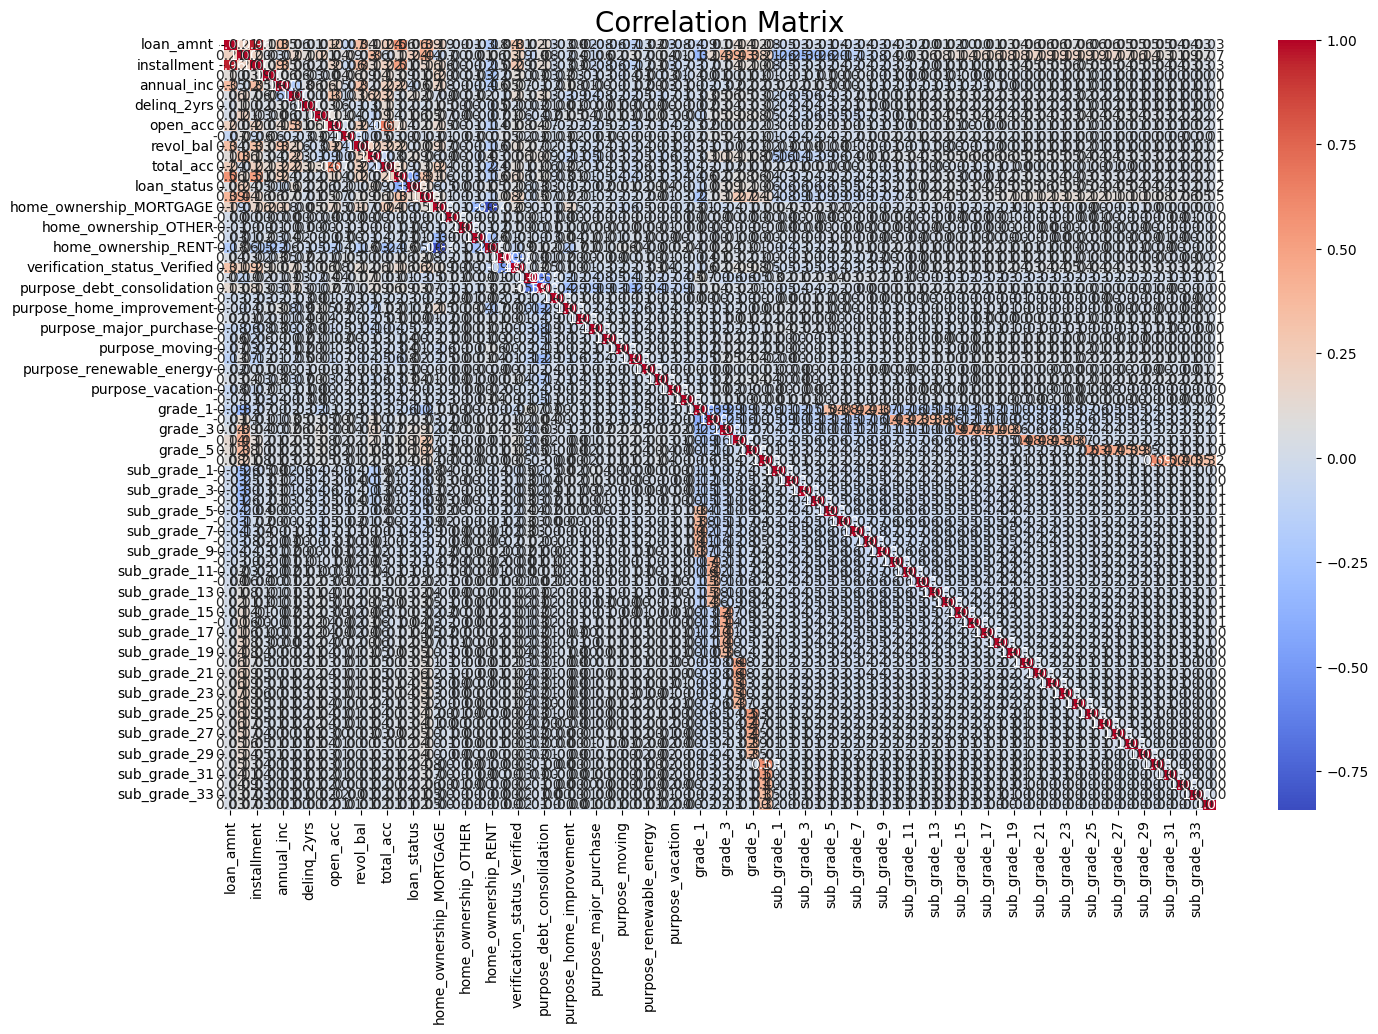

Features correlated with loan_status (correlation > 0.01):
loan_status                 1.000000
last_pymnt_amnt             0.378258
int_rate                    0.243949
term_numeric                0.163018
grade_4                     0.116734
                              ...   
open_acc                    0.016649
purpose_home_improvement    0.016502
sub_grade_33                0.012795
purpose_wedding             0.012260
emp_length                  0.010078
Name: loan_status, Length: 63, dtype: float64
loan_status             1.000000
last_pymnt_amnt         0.378258
int_rate                0.243949
term_numeric            0.163018
grade_4                 0.116734
                          ...   
purpose_vacation        0.001337
home_ownership_NONE     0.000852
purpose_house           0.000549
home_ownership_OTHER    0.000291
sub_grade_11            0.000027
Name: loan_status, Length: 76, dtype: float64


In [157]:
#correlation matrix
plt.figure(figsize=(16,10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', size=20)
plt.show()
#ranking  all features based on correlation with target variable
correlation_target = abs(correlation_matrix['loan_status'])
relevant_features = correlation_target[correlation_target > 0.01]
print("Features correlated with loan_status (correlation > 0.01):")
print(relevant_features.sort_values(ascending=False))
#show all features correlation with target variable
print(correlation_target.sort_values(ascending=False))

In [161]:
# Importing necessary packages for building and tuning our model
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.under_sampling import NearMiss               # For Undersampling
from imblearn.over_sampling import RandomOverSampler       # For Oversampling
from imblearn.combine import SMOTETomek                    # For Both Undersampling & Oversampling
from sklearn.model_selection import train_test_split
# Dividing our dataset into independent and dependent features
X=df_clean.drop('loan_status',axis=1)
y=df_clean['loan_status']

In [162]:
# Splitting our dataset between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [163]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
#count loan_status 
df_clean['loan_status'].value_counts()

loan_status
0    184739
1     42475
Name: count, dtype: int64

In [166]:
#precentage of loan_status
print("Fully Paid:",df_clean['loan_status'].value_counts()[0]/len(df_clean['loan_status'])*100)
print("Charged Off:",df_clean['loan_status'].value_counts()[1]/len(df_clean['loan_status'])*100)

Fully Paid: 81.30616951420248
Charged Off: 18.69383048579753


In [167]:
#undersampled the data
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 147757, 1: 34014})
The number of classes after fit Counter({0: 34014, 1: 34014})


In [168]:
#import model library
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# model 1 with random forest classifier with undersampled data
model1=RandomForestClassifier()
model1.fit(X_train_ns,y_train_ns)

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred=model1.predict(X_test)
print ('model1 with Random Forest with Undersampled Data')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))


model1 with Random Forest with Undersampled Data
Confusion Matrix: 
 [[25329 11653]
 [  976  7485]]


Accuracy Score: 
 0.7220914112184494


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     36982
           1       0.39      0.88      0.54      8461

    accuracy                           0.72     45443
   macro avg       0.68      0.78      0.67     45443
weighted avg       0.86      0.72      0.75     45443



In [169]:

# model 2 with xgboost classifier with undersampled data
model2=XGBClassifier()
model2.fit(X_train_ns,y_train_ns)

y_pred=model2.predict(X_test)
print('model2 with XGBoost Classifier with Undersampled Data')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

model2 with XGBoost Classifier with Undersampled Data
Confusion Matrix: 
 [[25827 11155]
 [  858  7603]]


Accuracy Score: 
 0.7356468543009924


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     36982
           1       0.41      0.90      0.56      8461

    accuracy                           0.74     45443
   macro avg       0.69      0.80      0.68     45443
weighted avg       0.86      0.74      0.76     45443



In [170]:

#model 3 with logistic regression with undersampled data
model3=LogisticRegression()
model3.fit(X_train_ns,y_train_ns)

y_pred=model3.predict(X_test)
print('model3 with Logistic Regression with undersampled data')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

model3 with Logistic Regression with undersampled data
Confusion Matrix: 
 [[29560  7422]
 [ 1425  7036]]


Accuracy Score: 
 0.8053165504038026


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87     36982
           1       0.49      0.83      0.61      8461

    accuracy                           0.81     45443
   macro avg       0.72      0.82      0.74     45443
weighted avg       0.87      0.81      0.82     45443



In [171]:
#oversampled the data
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 147757, 1: 34014})
The number of classes after fit Counter({0: 147757, 1: 147757})


In [172]:
#model 4 with random forest oversampled data
model4=RandomForestClassifier()
model4.fit(X_train_os,y_train_os)

print("Model 4 with random forest oversampled data")
y_pred=model4.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Model 4 with random forest oversampled data
Confusion Matrix: 
 [[34642  2340]
 [ 2136  6325]]


Accuracy Score: 
 0.9015029817573663


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     36982
           1       0.73      0.75      0.74      8461

    accuracy                           0.90     45443
   macro avg       0.84      0.84      0.84     45443
weighted avg       0.90      0.90      0.90     45443



In [173]:
# model 5 with xgboost classifier with oversampled data
model5=XGBClassifier()
model5.fit(X_train_os,y_train_os)

y_pred=model5.predict(X_test)
print('Model 5 with XGBoost Classifier with Oversampled Data')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

Model 5 with XGBoost Classifier with Oversampled Data
Confusion Matrix: 
 [[32530  4452]
 [  508  7953]]


Accuracy Score: 
 0.8908522764782255


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     36982
           1       0.64      0.94      0.76      8461

    accuracy                           0.89     45443
   macro avg       0.81      0.91      0.85     45443
weighted avg       0.92      0.89      0.90     45443



In [174]:

#model 6 with logistic regression with oversampled data
model6=LogisticRegression()
model6.fit(X_train_os,y_train_os)

y_pred=model6.predict(X_test)

print('model 6 with logistic regression with oversampled data')
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print('\n')
print("Accuracy Score: \n",accuracy_score(y_test,y_pred))
print('\n')
print("Classification Report: \n",classification_report(y_test,y_pred))

model 6 with logistic regression with oversampled data
Confusion Matrix: 
 [[29998  6984]
 [  352  8109]]


Accuracy Score: 
 0.8385669960169884


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.81      0.89     36982
           1       0.54      0.96      0.69      8461

    accuracy                           0.84     45443
   macro avg       0.76      0.88      0.79     45443
weighted avg       0.90      0.84      0.85     45443



In [178]:
#save the best model, model 4 to pickle
import pickle

pickle.dump(model4, open('model4.pkl', 'wb'))
pickle.dump(model5, open('model5.pkl', 'wb'))
pickle.dump(model6, open('model6.pkl', 'wb'))
pickle.dump(encoder, open('ohe_encoder.pkl', 'wb'))
